## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1 Responses:**
1. Regression is when a numeric outcome is predicted while classification predicts a categorical outcome. Although both are types of machine learning tasks the difference appears in the type of output they predict
Ex:
*   Numeric: What are the sales likely to be?
*   Categorical: What class of vehicle is it likely to be?
2. A confusion table is a cross-tablulation of predicted and actual values. Confusion tables help us to understand classification predictions, it is a metric for whether a model has done well or poorly.
3. SSE = Residual sum of squares. The sum of squares is a statistical measure of variability. Indicating the dispersion of data points around the mean. It is the difference between the observed and the predicted values, and tells us the total unexplained variation in the data failed to be captured by the model. It also can help show model accuracy and the goodness data patterns.
4. Overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in. Underfitting occurs when your model is too simple to reliably explain the phenomenon you are interested in.
5. Splitting the data up into training or test sets improves the models performance when involved with unseen data. The model learns patterns from the training set data then the test set evaluates how well the trained model performes on the unseen data.
Choosing k through accuracy or SSE also improves performance because it generalizes the data well instead of just memorizing what was trained. It also prevents overfitting and keeps the measure realistic to how it would perform in the real world.
6. Class label Prediction: The model picks one class it thinks is the most likely.
Ex: "Dog"
Strength: Simple andn clear, very good when only one final class matters.
Weakness: Not any other information given. Model might not always be correct if the class amounts are close.
Probability: Probability for each class
Ex:
Dog: 70%, Cat: 20%, Pig: 10%
Strength: Levels of confidence for each class.
Weakness: More technical data, not just one clear cut answer. Needs a well tuned, accurate, working model.




**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#2.1
cd = pd.read_csv('USA_cars_datasets.csv')
#cd.head()

X = cd.loc[:,['price', 'year', 'mileage']]
print(X.head())
print(X.shape, '\n')

print(X['mileage'].isna().any())
print(X['price'].isna().any())
print(X['year'].isna().any())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3) 

False
False
False


In [3]:
#2.2
def maxmin(z):
  z = (z-z.min())/(z.max()-z.min())
  return z

X = X.apply(maxmin)

In [4]:
#2.3
train, eval = train_test_split(X, test_size=0.2, random_state=65)

print("Train shape:", train.shape)
print("Test shape:", eval.shape)

Train shape: (1999, 3)
Test shape: (500, 3)


K=3, MSE=0.0185


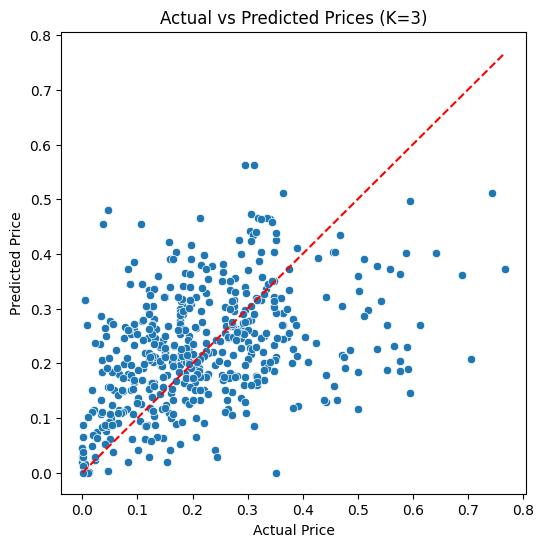

K=10, MSE=0.0155


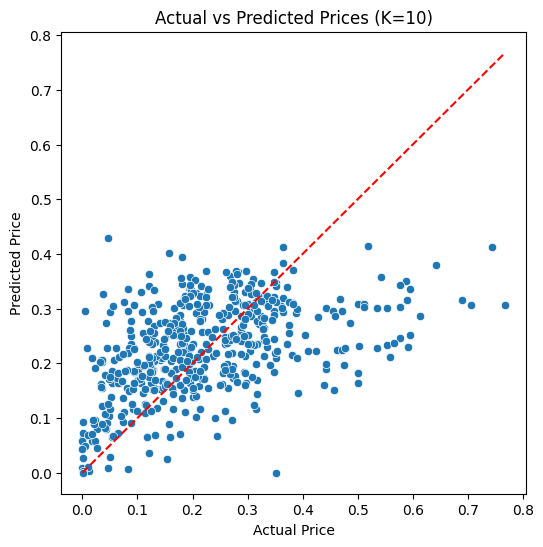

K=25, MSE=0.0146


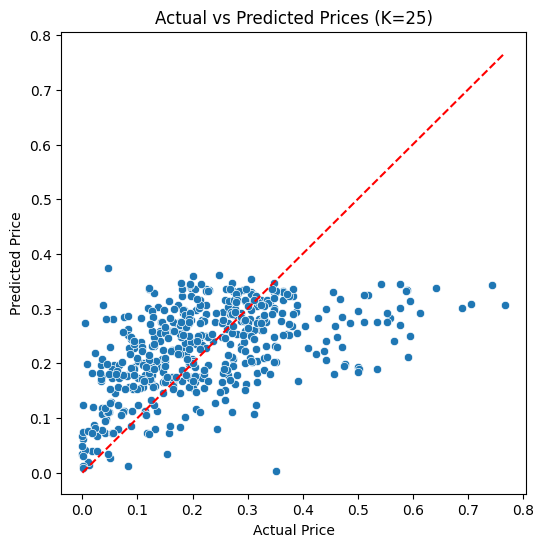

K=50, MSE=0.0144


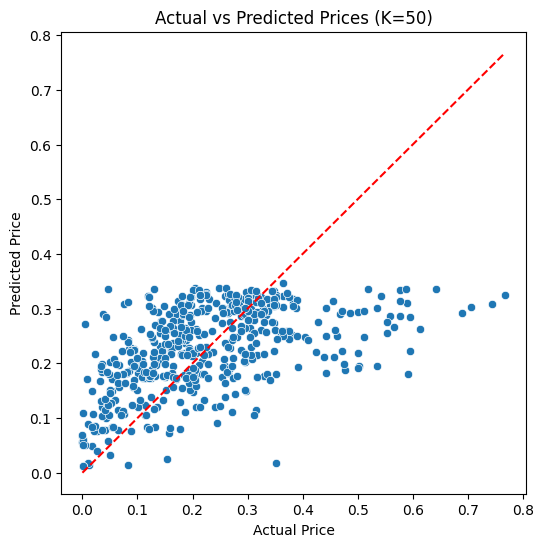

K=100, MSE=0.0145


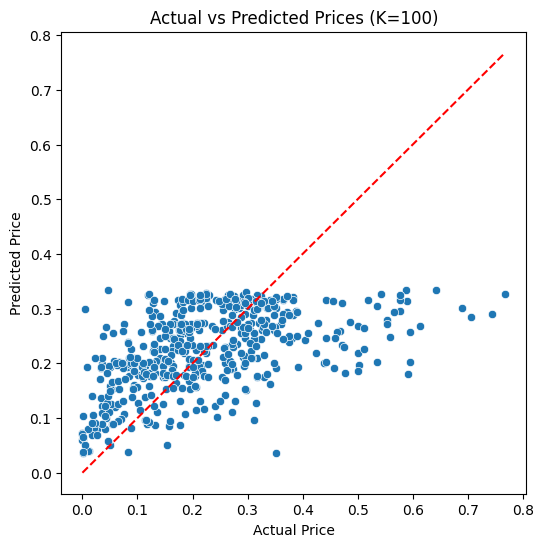

K=300, MSE=0.0149


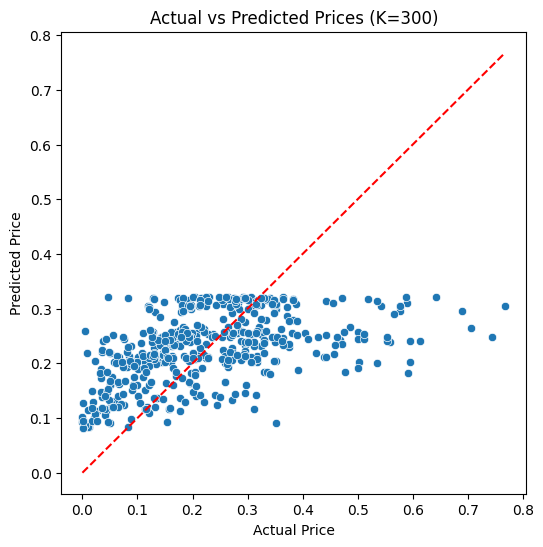

In [19]:
#2.4.2
def knn_class(x_hat,X,K):
  squared_differences = (X[['year', 'mileage']].values - x_hat)**2
  distances = np.sqrt(squared_differences.sum(axis=1))
  neighbors = np.argsort(distances)[:K].tolist()
  g_star = X['price'].iloc[neighbors]
  return np.mean(g_star)

k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
  preds = []
  for _, row in eval.iterrows():
    x_hat = np.array([row['year'], row['mileage']])
    y_hat = knn_class(x_hat, train, k)
    preds.append(y_hat) #predicted values
  mse = mean_squared_error(eval['price'], preds)
  mse_results[k] = mse
  print(f"K={k}, MSE={mse:.4f}")

  #Scatter plots
  plt.figure(figsize=(6, 6))
  sns.scatterplot(x=eval['price'], y=preds)
  plt.plot([eval['price'].min(), eval['price'].max()],
             [eval['price'].min(), eval['price'].max()],
             color='red', linestyle='--')  # reference line y=x
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title(f'Actual vs Predicted Prices (K={k})')
  plt.show()


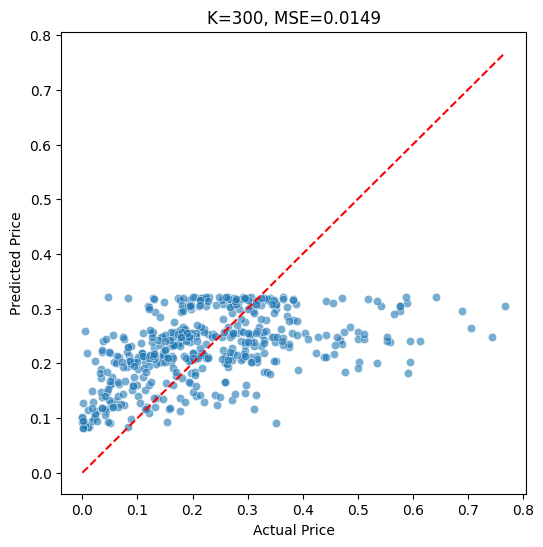

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=eval['price'], y=preds, alpha=0.6)
plt.plot([eval['price'].min(), eval['price'].max()],
             [eval['price'].min(), eval['price'].max()],
             color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"K={k}, MSE={mse:.4f}")
plt.show()

<Axes: xlabel='price'>

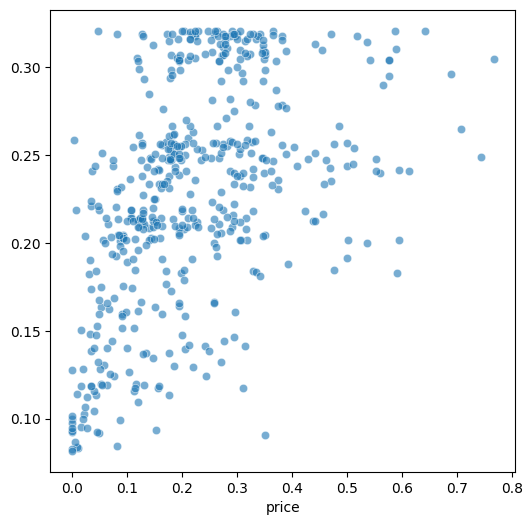

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=eval['price'], y=preds, alpha=0.6)

#plt.plot([eval['price'].min(), eval['price'].max()],
# [eval['price'].min(), eval['price'].max()],
#             color='red', linestyle='--')

As the K value increases from 3-50 the MSE gets smaller. THEN there is a change adter 50 with 100 and 300 where the K value slightly increases.  
*   Small K (3,10) = MSE higher. Small K means only a few neighbors used (overfitting)
*   Middle K (25,50) = lowest MSE. Averages over more neighbots reducing variance w/o bias
*   Large (100,300) = slight increase in MSE. Averages over a large portion of dataset (underfitting)


**Response 2.5:**
Optimal K for this data would be **K = 50** because the lowest MSE occurs at this K value.


**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.